In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import glob
import ast
import datetime
import json
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
%matplotlib inline

# machine learning
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier, Pool, cv
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#from pandas_ml import ConfusionMatrix
from IPython.display import display

from sklearn import metrics, preprocessing
from datetime import datetime
from dateutil.relativedelta import relativedelta
import numpy as np

import warnings
warnings.filterwarnings('ignore')
pd.set_option('mode.chained_assignment', None)

C:\Users\lohitr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
ecom = pd.read_csv("C:/Users/lohitr/Desktop/train_ecommerce.csv")
ecom.head()
###TEST Data#####
ecom_test =pd.read_csv("C:/Users/lohitr/Desktop/test_ecommerce.csv")
ecom_test.head()

,session_id,startTime,endTime,ProductList
0,u12112,08/12/14 13:36,08/12/14 13:36,A00002/B00003/C00006/D19956/
1,u19725,19/12/14 13:52,19/12/14 13:52,A00002/B00005/C00067/D02026/
2,u11795,01/12/14 10:44,01/12/14 10:44,A00002/B00002/C00004/D12538/
3,u22639,08/12/14 20:19,08/12/14 20:22,A00002/B00003/C00079/D22781/;A00002/B00003/C00...
4,u18034,15/12/14 19:33,15/12/14 19:33,A00002/B00001/C00010/D23419/


In [3]:
ecom.columns


Index(['session_id', 'startTime', 'endTime', 'ProductList', 'gender'], dtype='object')

In [4]:
ecom.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [5]:
ecom.tail()

,session_id,startTime,endTime,ProductList,gender
10495,u15442,18/11/14 7:39,18/11/14 7:42,A00002/B00002/C00007/D06407/;A00002/B00002/C00...,female
10496,u17986,25/11/14 15:16,25/11/14 15:16,A00006/B00030/C00334/D11660/,female
10497,u22508,09/12/14 10:11,09/12/14 10:11,A00002/B00002/C00007/D18028/,female
10498,u17087,22/11/14 11:27,22/11/14 11:27,A00003/B00012/C00131/D09453/;A00003/B00012/C00...,female
10499,u23137,19/12/14 3:11,19/12/14 3:19,A00002/B00001/C00010/D02309/;A00002/B00002/C00...,female


In [6]:
ecom.dtypes

session_id     object
startTime      object
endTime        object
ProductList    object
gender         object
dtype: object

In [7]:
ecom.count()

session_id     10500
startTime      10500
endTime        10500
ProductList    10500
gender         10500
dtype: int64

In [8]:
ecom.describe()

,session_id,startTime,endTime,ProductList,gender
count,10500,10500,10500,10500,10500
unique,10500,8815,8803,9402,2
top,u21900,05/12/14 20:23,09/12/14 14:58,A00002/B00002/C00007/D00266/,female
freq,1,5,5,25,8192


In [9]:
ecom.ProductList.unique()

array(['A00002/B00003/C00006/D28435/;A00002/B00003/C00006/D02554/;A00002/B00003/C00006/D28436/;A00002/B00003/C00006/D28437/',
       'A00001/B00009/C00031/D29404/;A00001/B00009/C00031/D02617/;A00001/B00009/C00031/D29407/;A00001/B00009/C00031/D29410/;A00001/B00009/C00031/D29411/;A00001/B00009/C00031/D25444/;A00001/B00009/C00031/D29418/',
       'A00002/B00001/C00020/D16944/', ...,
       'A00006/B00030/C00334/D11660/',
       'A00003/B00012/C00131/D09453/;A00003/B00012/C00073/D09454/',
       'A00002/B00001/C00010/D02309/;A00002/B00002/C00002/D32450/;A00002/B00001/C00059/D21254/;A00003/B00004/C00089/D18619/'],
      dtype=object)

In [10]:
print(ecom['ProductList'].value_counts().count())

9402


In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
##################################TRAIN Data#####################
labelencoder_X = LabelEncoder()
ecom.iloc[ :,3]
ecom.iloc[ :,3] = labelencoder_X.fit_transform(ecom.iloc[ :,3])


##################################TEST Data#####################

labelencoder_X = LabelEncoder()
ecom_test.iloc[ :,3]
ecom_test.iloc[ :,3] = labelencoder_X.fit_transform(ecom_test.iloc[ :,3])

In [13]:
# First convert Date and Time columns to DateTime type
##################################TRAIN Data#####################
ecom['startTime'] = pd.to_datetime(ecom['startTime'])
ecom['endTime'] = pd.to_datetime(ecom['endTime'])
ecom['Time'] =ecom['startTime']-ecom['endTime']
ecom['Time']=ecom.Time.dt.total_seconds()/3600
ecom['Time'] =ecom['Time'].astype(str)
ecom['Time']=ecom['Time'].str.replace('-','').astype(float)
ecom['Time']=ecom['Time'].astype(int)


##################################TEST Data#####################

# First convert Date and Time columns to DateTime type
ecom_test['startTime'] = pd.to_datetime(ecom_test['startTime'])
ecom_test['endTime'] = pd.to_datetime(ecom_test['endTime'])
ecom_test['Time'] =ecom_test['startTime']-ecom_test['endTime']
ecom_test['Time']=ecom_test.Time.dt.total_seconds()/60
ecom_test['Time'] =ecom_test['Time'].astype(str)
ecom_test['Time']=ecom_test['Time'].str.replace('-','').astype(float)
ecom_test['Time']=ecom_test['Time'].astype(int)
#ecom_test
ecom

,session_id,startTime,endTime,ProductList,gender,Time
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,4955,female,0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,776,male,0
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,1670,female,0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,5654,female,0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,95,male,0
...,...,...,...,...,...,...
10495,u15442,2014-11-18 07:39:00,2014-11-18 07:42:00,3525,female,0
10496,u17986,2014-11-25 15:16:00,2014-11-25 15:16:00,9178,female,0
10497,u22508,2014-09-12 10:11:00,2014-09-12 10:11:00,3795,female,0
10498,u17087,2014-11-22 11:27:00,2014-11-22 11:27:00,8131,female,0


In [14]:
ecom.gender.nunique()

2

In [15]:
ecom.gender.value_counts()

female    8192
male      2308
Name: gender, dtype: int64

In [16]:
ecom.gender.astype('category')

0        female
1          male
2        female
3        female
4          male
          ...  
10495    female
10496    female
10497    female
10498    female
10499    female
Name: gender, Length: 10500, dtype: category
Categories (2, object): [female, male]

In [17]:
ecom.dtypes

session_id             object
startTime      datetime64[ns]
endTime        datetime64[ns]
ProductList             int64
gender                 object
Time                    int32
dtype: object

In [18]:
ecom.Time.value_counts()

0       10369
1          21
2          12
5           4
77          3
        ...  
3773        1
8111        1
21          1
61          1
3738        1
Name: Time, Length: 89, dtype: int64

In [19]:
ecom['endTime'].groupby([ecom['endTime'].dt.month, ecom['endTime'].dt.date,ecom['endTime'].dt.day, ecom['endTime'].dt.minute]).agg({'count'})

count
endTime endTime    endTime endTime       
1       2014-01-12 12      0            4
                           1            4
                           2            5
                           3           10
                           4            4
...                                   ...
12      2014-12-22 22      55           7
                           56           6
                           57           6
                           58           8
                           59           9

[1958 rows x 1 columns]

In [20]:
min(ecom['startTime']), max(ecom['startTime'])

(Timestamp('2014-01-12 00:07:00'), Timestamp('2014-12-22 23:54:00'))

In [21]:
min(ecom['endTime']),max(ecom['endTime'])

(Timestamp('2014-01-12 00:21:00'), Timestamp('2014-12-22 23:54:00'))

In [22]:
ecom.head()

,session_id,startTime,endTime,ProductList,gender,Time
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,4955,female,0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,776,male,0
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,1670,female,0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,5654,female,0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,95,male,0


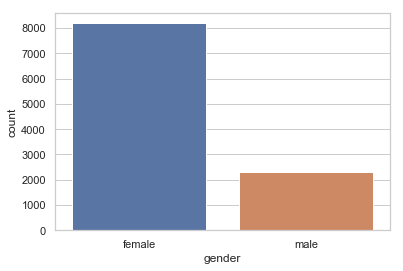

In [29]:

#indexNames = ecom[ ecom['Time'] == 0 ].index
 
# Delete these row indexes from dataFrame
#ecom.drop(indexNames , inplace=True)
#ecom

# Countplot for 'Survived' variable
sns.countplot(ecom['gender'])

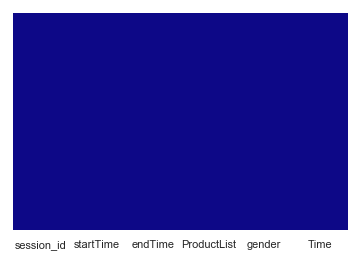

In [30]:
# Excuse me, can we have a plot please?!
sns.heatmap(ecom.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')

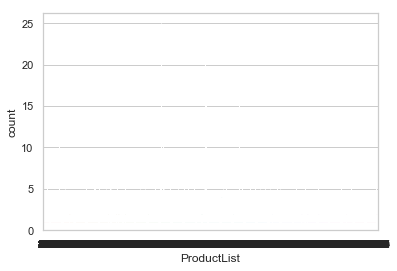

In [31]:
sns.countplot(ecom['ProductList'])

In [32]:
ecom_group=ecom['endTime'].groupby([ecom['endTime'].dt.month, ecom['endTime'].dt.date,ecom['endTime'].dt.day, ecom['endTime'].dt.minute]).agg({'count'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F75AA19A90>]],
      dtype=object)

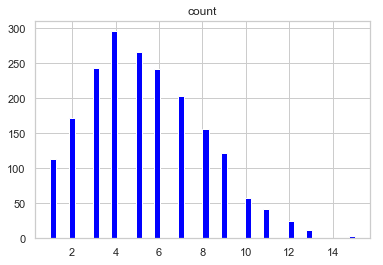

In [33]:
ecom_group.hist(bins = 50, color = 'blue')

In [43]:
ecom.groupby('ProductList').agg({'count'})

,session_id,startTime,endTime,gender,Time
,count,count,count,count,count
ProductList,,,,,
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
9397,1,1,1,1,1
9398,1,1,1,1,1


In [60]:
ecom_test.head()

# define training and testing sets

X_train = ecom[["ProductList","Time"]]
Y_train = ecom["gender"]
X_test  = ecom_test[["ProductList","Time"]]
Y_test =ecom["gender"]

In [45]:

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.7804761904761904

In [46]:
#Support Vector Machines

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

svc.score(X_train, Y_train)

0.9346666666666666

In [71]:
# Gradient Boosts
grad_boost = GradientBoostingClassifier(n_estimators=1000)
grad_boost.fit(X_train, Y_train)
Y_pred = grad_boost.predict(X_test)
grad_boost.score(X_test, Y_pred)

1.0

In [73]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=500,oob_score=True)

random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)

# Probabilities for each class
rf_probs = random_forest.predict_proba(X_test)[:, 1]

random_forest.score(X_test, Y_pred_rf)

1.0

In [70]:
submission = pd.DataFrame({"session_id":ecom_test["session_id"],"gender": Y_pred_rf})
submission.to_csv('C:/Users/lohitr/Desktop/sample_submission.csv', index=False)